# Least Squares Problems

We're still dealing with least squares problems: You want to find a model which minimizes the sum of squared **residuals** given a collection of data points.

![Least Squares Regression](https://i.imgur.com/pfWN159.png)

Previously, we performed **linear regression**: we fit a linear model to the data. We can also perform **polynomial regression** to fit a polynomial model to the data.


## Linear Model:

$$ y = c_0 + c_1 t$$

## Quadratic Model:

$$ y = c_0 + c_1 t + c_2 t^2$$

## n-degree Polynomial

$$ y = c_0 + c_1 t + c_2 t^2 + \dots c_n t^n$$

# Code Example: The Simple Example From Notes

In the notes, a graph of $Y = 0.5 X^2 + X + 2 + \text{Gaussian Noise}$ was generated.

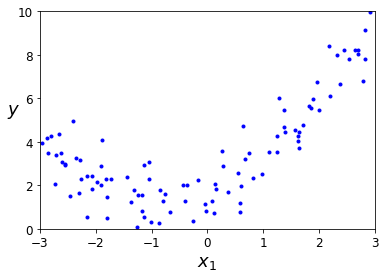

In [1]:
import numpy as np
import numpy.random as rnd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 #randomly spaced
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) #generator
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Polynomial Regression

With polynomial regression, we're still trying to find $x$ to minimize
$$ \|A\mathbf{x} - b\|^2$$
where $\mathbf{x} = \begin{bmatrix}
c_0 \\
c_1 \\
\vdots \\
c_n
\end{bmatrix}$

In polynomial regression, rather than fitting a line $y = c_0 + c_1 t$ with 2 variables, we fit a polynomial $ y = c_0 + c_1 t + c_2 t^2 + \dots c_n t^n$ with $n$ variables.

So then when we're minimizing $||A\mathbf{x} - b||^2$, $A = \begin{bmatrix} 1 & t_0 & t_0^2 \\
1 & t_1 & t_1^2 \\
1 & t_2 & t_2^2 \\
\vdots & \vdots & \vdots \\
1 & t_m & t_m^2\end{bmatrix}$, $\mathbf{x} = \begin{bmatrix}
c_0 \\
c_1\\
c_2
\end{bmatrix}$

and $b = y$
### Steps of Polynomial Regression (Solving the Normal Equation)

1. Construct $A$: 

$A = \begin{bmatrix} 1 & t_0 & t_0^2 & \dots & t_0^n \\
1 & t_1 & t_1^2 & \dots & t_1^n \\
1 & t_2 & t_2^2 & \dots & t_2^n \\
\vdots & \vdots & \vdots & \vdots \\
1 & t_n & t_n^2 & \dots & t_m^n \end{bmatrix}$

2. Solve $x = (A^T A)^{-1} A^T b$

$x$ is a $(n+1)$ length vector containing the coefficients for the model $y = c_0 + c_1 t + \dots + c_n t^n$.

In terms of coding, it's much more efficient to use scikit-learn's packages for polynomial regression.

### Steps of Evaluating Polynomial Regression Model

To evaluate your model, you must transform your data. Say you have a point $t$ and you want to predict $y$ for that point. Then construct the matrix $\begin{bmatrix} 1 & t & t^2\end{bmatrix}$ and compute $\begin{bmatrix} 1 & t & t^2\end{bmatrix}\mathbf{x} = y$

## How to Perform Polynomial Regression

In [2]:
# Fitting Polynomial Regression to the dataset
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) # X_poly will be the matrix A
 
lin = LinearRegression()
lin.fit(X_poly, y) # will obtain the coefficients of the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Polynomial Regression: Mechanics

The "PolynomialFeatures" function:

"Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree."

The PolynomialFeatures will generate polynomial features of a specified degree for a dataset. Our data has a single input, $t$, so poly.fit_transform will generate a matrix
$A = \begin{bmatrix} 1 & t_0 & t_0^2 & \dots & t_0^n \\
1 & t_1 & t_1^2 & \dots & t_1^n \\
1 & t_2 & t_2^2 & \dots & t_2^n \\
\vdots & \vdots & \vdots & \vdots \\
1 & t_n & t_n^2 & \dots & t_m^n \end{bmatrix}$


In [3]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) # generates the matrix A, which is in X_poly
print(X_poly[0:4])

## Compare this to constructing A manually:
A = np.c_[np.ones((len(X), 1)), X, np.square(X)]
print(A[0:4])
print(np.linalg.norm(X_poly - A))

[[ 1.         -0.75275929  0.56664654]
 [ 1.          2.70428584  7.3131619 ]
 [ 1.          1.39196365  1.93756281]
 [ 1.          0.59195091  0.35040587]]
[[ 1.         -0.75275929  0.56664654]
 [ 1.          2.70428584  7.3131619 ]
 [ 1.          1.39196365  1.93756281]
 [ 1.          0.59195091  0.35040587]]
0.0


The "LinearRegression" fucntion:

```python
lin = Linear.Regression()
```
Sets up the linear regression object.
```python
lin.fit(X_poly, y)
```
Takes in $X_{\text{poly}}$ as your matrix $A$, and $y$ as your matrix $b$ to minimize $\|Ax - b\|^2$.
```python
lin.predict(X_new_poly)
```
Given a matrix $A_{\text{new}}$, predict the output of the model: This is done by computing $A_{\text{\new}} \mathbf{x}$. The intercept of the model is stored in ```lin.intercept_```, while the coefficients are stored in ```lin.coefs_```



## Plotting the Polynomial Regression Plot

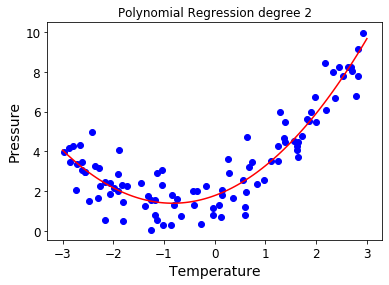

In [4]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1) # 100 equally spaced points from -3 to 3
X_new_poly = poly.transform(X_new) # be a 100 x 3 matrix: multiply by 3x1 vector of coefficients to get prediction
y_new = lin.predict(X_new_poly)

# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue') # plot the data points
 
plt.plot(X_new, lin.predict(X_new_poly), color = 'red') # plot the line
plt.title('Polynomial Regression degree 2')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
 
plt.show()

In [5]:
lin.coef_

array([[0.        , 0.93366893, 0.56456263]])

$ y = 1.78 + .93t + .56t^2$

In [6]:
# lin.predict is the same as performing matrix multiplication
yMult = np.dot(X_new_poly, [lin.intercept_, lin.coef_[0][1], lin.coef_[0][2]])
print(y_new[0:4]) # prediction from calling lin.predict
print(yMult[0:4]) # prediction from multiplying the coefficients directly

[[4.06140272]
 [3.9147669 ]
 [3.77227847]
 [3.63393742]]
[4.06140272 3.9147669  3.77227847 3.63393742]


# Fitting with an n-degree Polynomial and the Pipeline Function

For an $n$-degree polynomial, you'd essentially do the same thing as before, just changing the degree of ```PolynomialFeatures``` to $n$.

The problem with the previous approach is that inference is rather tedious:

### Previous Approach

To train the model:
```python
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X) # generates the matrix A, which is in X_poly

lin = LinearRegression()
lin.fit(X_poly, y)
```

To perform inference on new data, we must transform it:
```python
X_new_poly = poly.transform(X_new)
y_new = lin.predict(X_new_poly)
```

### Pipeline Approach

To train the model:
```python
polybig_features = PolynomialFeatures(degree=degree,
include_bias=False)
std_scaler = StandardScaler() # This is a new step, just to normalize the data
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
("poly_features", polybig_features),
("std_scaler", std_scaler),
("lin_reg", lin_reg),
])

polynomial_regression.fit(X, y)
```

To perform inference on new data:
```
y_newbig = polynomial_regression.predict(X_new)
```

$X_{new}$ is an $m \times 1$ vector of new input data points

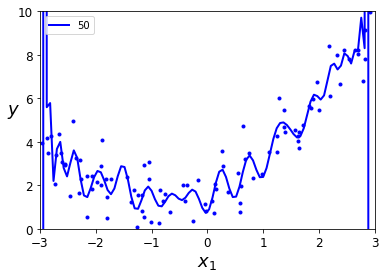

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

degree = 50
polybig_features = PolynomialFeatures(degree=degree,
include_bias=False)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
polynomial_regression = Pipeline([
("poly_features", polybig_features),
("std_scaler", std_scaler),
("lin_reg", lin_reg),
])
polynomial_regression.fit(X, y) # we have the coefficients of the quadratic polynomial now
y_newbig = polynomial_regression.predict(X_new) # predict on new data
plt.plot(X_new, y_newbig, 'b', label=str(degree), linewidth=2)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [8]:
poly = PolynomialFeatures(degree = 3, include_bias = False) # removes the intercept term
X_poly = poly.fit_transform(X) # generates the matrix A, which is in X_poly
print(X_poly[0:4])
std_scaler.fit(X_poly) # getting mean and standard deviation of each column of X_poly
std_scaler.transform(X_poly) # standardize each column of X_poly

[[-0.75275929  0.56664654 -0.42654845]
 [ 2.70428584  7.3131619  19.77688015]
 [ 1.39196365  1.93756281  2.697017  ]
 [ 0.59195091  0.35040587  0.20742307]]


array([[-0.32311215, -0.98092625,  0.06194131],
       [ 1.62343393,  1.54544437,  1.99736325],
       [ 0.88450935, -0.46755862,  0.3611686 ],
       [ 0.43404902, -1.06190199,  0.1226737 ],
       [-1.06136481,  0.40198854, -0.73938477],
       [-1.0614463 ,  0.40221225, -0.73956195],
       [-1.39222838,  1.43957464, -1.68296318],
       [ 1.33783032,  0.61447228,  1.11875827],
       [ 0.44234815, -1.05528623,  0.12419524],
       [ 0.80369344, -0.60947232,  0.28920452],
       [-1.51891535,  1.9053293 , -2.17722675],
       [ 1.68828413,  1.7836779 ,  2.24988206],
       [ 1.22386509,  0.29676894,  0.86304988],
       [-0.87109182, -0.07758752, -0.38974274],
       [-0.97418076,  0.17162867, -0.56370054],
       [-0.96884443,  0.15811205, -0.5538234 ],
       [-0.5606064 , -0.67651434, -0.05242161],
       [ 0.18437843, -1.18485642,  0.10311721],
       [-0.12917552, -1.13068194,  0.0962812 ],
       [-0.60456985, -0.60554837, -0.08548099],
       [ 0.478625  , -1.02445769,  0.131

Feature: each column of the $A$ matrix, or $X_{poly}$

### StandardScaler:

**Standardizes** the data by setting the mean and variance of each **feature** equal to 0 and 1 respectively. This is generally important with machine learning methods; if one of the features has much higher variance than other features, it will have too large an impact in the prediction.

In [9]:
X_poly[0:4]

array([[-0.75275929,  0.56664654, -0.42654845],
       [ 2.70428584,  7.3131619 , 19.77688015],
       [ 1.39196365,  1.93756281,  2.697017  ],
       [ 0.59195091,  0.35040587,  0.20742307]])

In [10]:
# StandardScaler applies this to every column of X_poly
(X_poly[:,1] - np.mean(X_poly[:,1])) / np.std(X_poly[:,1])

array([-0.98092625,  1.54544437, -0.46755862, -1.06190199,  0.40198854,
        0.40221225,  1.43957464,  0.61447228, -1.05528623, -0.60947232,
        1.9053293 ,  1.7836779 ,  0.29676894, -0.07758752,  0.17162867,
        0.15811205, -0.67651434, -1.18485642, -1.13068194, -0.60554837,
       -1.02445769,  0.55892687, -0.61069033, -0.95236048, -1.1671025 ,
       -0.09677707,  0.02280568, -1.19038713, -1.07798534,  1.58000736,
       -1.03719954,  0.27029566,  1.35720643,  1.52326607,  1.72972613,
        0.0890387 , -0.67847339,  0.98900986, -0.73555129, -1.14483364,
        0.73270179, -1.19280503,  1.72946809,  1.06552043, -0.40870209,
       -0.83704002, -0.71518279, -1.18768951, -1.16370525,  0.14576365,
        1.77955885, -0.17263778,  1.41084981,  0.90840612, -1.06391187,
        1.20618966,  1.0897218 ,  0.05287603,  1.59498456, -0.7818221 ,
       -1.02605282, -0.48831824,  0.26374389, -0.91649509, -0.5461727 ,
       -1.16854348,  0.54505142,  0.0380011 ,  1.24702725,  2.00

### Pipeline:
```Pipeline``` simplifies training and prediction, since it'll automate data transformations.
   

# Loading Data

Oftentimes you'll have to load data from a text file to store in an array.

To load the COVID data:

```python
data = np.loadtxt("CaCovidInfMarch24toMidJuly.txt")
```
This will store the contents of the TXT in a text file.

In [11]:
data = np.loadtxt("CaCovidInfMarch24toMidJuly.txt")
Xcovid = np.arange(1, len(data) + 1) 
print(Xcovid)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120]


# Training/Validation Data Split

**Training Data**: Data that you input into your model to learn parameters.

**Validation Data**: Data used to evaluate your model while learning the parameters.

**Test Data**: The data you're trying to evaluate your model on. You don't use this to tune model parameters.

Usually you'll want to form a training-validation data split so you can evaluate the performance of your model.

## Forming the Split:

Depending on the context, there may be a specific way you should form the data split. For example, in the Homework, you simply want to let the first 90 days be training data, last 30 days be validation data.

```python
X_train = X[0:90]
X_valid = X[90:120]
y_train = data[0:90]
y_valid = data[90:120]
```

If instead the data needs to be **randomly split** into training and validation sets:
```python
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, data, test_size=0.33, random_state=42)
```
This will randomly put 33\% of the entries into the validation set.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Xcovid, data, test_size=0.33, random_state=44)
print(X_valid)
print(len(X_valid))

[ 27  66 109  53  70  20  10  49  87  34   7   8  78  25  81 105 112  40
 110 120  89  80  82  47  39  48  63  28 113  12  77  95  42   6  31  61
 108  92  69  99]
40


# Overfitting / Underfitting

You can fit a polynomial of whatever degree to the model. However, if your model has **too many parameters**, it will **overfit** to the data; it will fit exactly to the data while being much worse at predicting new data. If it has too few, it will **underfit** to the data.

![overfitting](https://upload.wikimedia.org/wikipedia/commons/6/68/Overfitted_Data.png)


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)

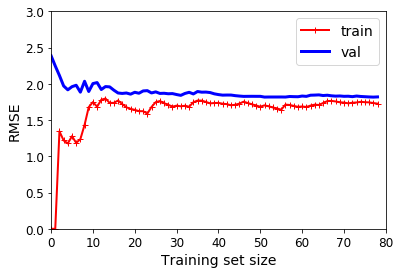

In [14]:
#run linear regression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

Text(0.5, 1.0, 'Training vs validation with degree 2 polynomial')

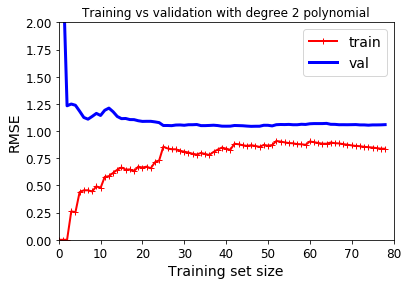

In [15]:
degree = 2
polybig_features = PolynomialFeatures(degree=degree,
include_bias=False)
polynomial_regression = Pipeline([
("poly_features", polybig_features),
("std_scaler", StandardScaler()),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2])
plt.title("Training vs validation with degree {} polynomial".format(degree))

Text(0.5, 1.0, 'Training vs validation with degree 5 polynomial')

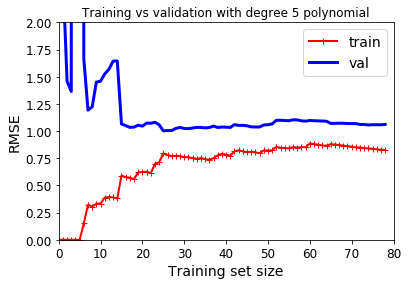

In [16]:
degree = 5
polybig_features = PolynomialFeatures(degree=degree,
include_bias=False)
polynomial_regression = Pipeline([
("poly_features", polybig_features),
("std_scaler", StandardScaler()),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 2])
plt.title("Training vs validation with degree {} polynomial".format(degree))

This is an example of **overfitting**: The training set MSE is low, but the validation set MSE is extremely high.

The linear model **underfits**, the degree 43 model **overfits**, while the degree 2 model is effective.

### How to fix overfitting/underfitting:

To fix **overfitting**: You can increase the number of data points in the training set.

To fix **underfitting**: out of luck, your model isn't sufficiently complex enough to model the data set

In [17]:
# Consider 1000 points instead:
m2 = 1000
X2 = 6 * np.random.rand(m2, 1) - 3 #randomly spaced
y2 = 0.5 * X2**2 + X2 + 2 + np.random.randn(m2, 1) #generator

Text(0.5, 1.0, 'Training vs validation with degree 4 polynomial')

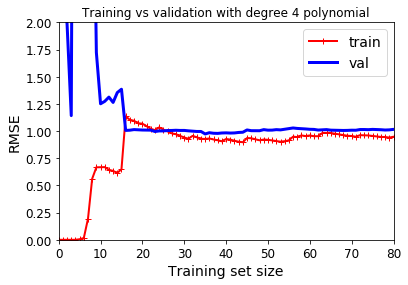

In [18]:
degree = 4
polybig_features = PolynomialFeatures(degree=degree,
include_bias=False)
polynomial_regression = Pipeline([
("poly_features", polybig_features),
("std_scaler", StandardScaler()),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X2, y2)
plt.axis([0, 80, 0, 2])
plt.title("Training vs validation with degree {} polynomial".format(degree))

If there's a large gap between training error and validation error, that means your model is **overfitting** to the training data.

### (Root) Mean-squared Error

We assume a root mean-squared error loss function:
$$RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^m |y_i - \hat{y}_i|^2}$$

where $\hat{y}_i$ is the prediction from our model.

This graph plots the RMSE of the training set and validation set as the model trains the data.

To evaluate RMSE on the training set:
```python
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
```

To evaluate RMSE on the validation set:
```python
np.sqrt(mean_squared_error(y_valid, model.predict(X_val)))
```

Validation error should always be slightly higher than training error since you're minimizing error on the training set, not the foreign validation set.